In [2]:
import numpy as np
import pandas as pd
import csv

#作图分析
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
import matplotlib
matplotlib.colors
matplotlib.colors.rgb_to_hsv
matplotlib.colors.to_rgba
matplotlib.figure.Figure.get_size_inches
matplotlib.figure.Figure.subplots_adjust
matplotlib.axes.Axes.text
matplotlib.axes.Axes.hlines
mpl.rcParams['font.sans-serif'] = ['SimHei']

def div(num):
    def real_div(input):
        return input / num
    return real_div

In [3]:
data = pd.read_csv('class_data.csv')
data.head()

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,1、您的年龄,2、请问您的家乡位于,3、请问您的家乡处在城市还是农村,4、您的民族,...,13、亖,14、您认为描述死亡的词汇在代际上是否存在变化,15、请问您是否了解过下列丧葬方式,16、如果让您做出选择，您对下列丧葬方式的意愿程度分别是（数值越大代表频率越高）—土葬,16、水葬,16、天葬,16、火葬,16、其他,17、您对死后拥有一个丧葬仪式的意愿强烈程度是,总分
0,1,2023/5/11 15:58:56,140秒,微信,NaN,183.172.243.103(北京-北京),18周岁-30周岁,黑龙江-大庆,城市,汉族,...,2,是,土葬┋火葬┋水葬┋天葬,10,2,1,10,1,4,159
1,2,2023/5/11 16:00:51,243秒,微信,NaN,203.93.11.168(北京-北京),18周岁-30周岁,黑龙江-大庆,城市,汉族,...,0,是,土葬┋火葬,6,2,0,4,0,6,66
2,3,2023/5/11 16:03:02,160秒,微信,NaN,223.104.41.235(北京-北京),18周岁-30周岁,黑龙江-鸡西,城市,汉族,...,2,是,土葬┋火葬┋水葬,2,8,0,4,0,3,87
3,4,2023/5/11 16:03:32,258秒,微信,NaN,219.142.99.23(北京-北京),18周岁-30周岁,黑龙江-大庆,城市,汉族,...,1,是,土葬┋火葬┋水葬┋天葬,7,5,4,8,1,8,162
4,5,2023/5/11 16:05:33,414秒,微信,NaN,36.112.206.87(北京-北京),18周岁-30周岁,黑龙江-大庆,城市,汉族,...,3,是,土葬┋火葬┋水葬┋天葬,1,9,2,4,0,4,98


In [4]:
data = data.drop(['序号','提交答卷时间','所用时间','来源','来源详情','来自IP','总分'], axis=1)
data.columns

Index(['1、您的年龄', '2、请问您的家乡位于', '3、请问您的家乡处在城市还是农村', '4、您的民族',
       '5、您是否听说过下列宗教用语中关于死亡的表述', '6、您和您周围的人对上述词语的使用频率（数值越大代表频率越高）—圆寂', '6、归仙',
       '6、羽化', '6、舍身', '6、归寂', '7、您在多大程度上觉得这些词汇不吉利/晦气/让人生理不适',
       '8、您是否听说过下列关于死亡的常规表述？', '9、请问您和您周围的人对上述词汇的使用频率（数值越大代表频率越高）—死', '9、去世',
       '9、没了', '9、走了', '9、作古', '9、长眠', '9、归西', '9、离开人世',
       '10、您在多大程度让认为这些词不吉利/晦气/让人心里不适—死', '10、去世', '10、没了', '10、走了', '10、作古',
       '10、长眠', '10、归西', '10、离开人世', '11、请问您是否听说过下列网络用语中关于死亡的表述',
       '12、请问您和您周围的人对上述词汇的使用频率—寄', '12、噶', '12、无', '12、4', '12、亖',
       '13、您在多大程度让认为这些词不吉利/晦气/让人心里不适—寄', '13、噶', '13、无', '13、4', '13、亖',
       '14、您认为描述死亡的词汇在代际上是否存在变化', '15、请问您是否了解过下列丧葬方式',
       '16、如果让您做出选择，您对下列丧葬方式的意愿程度分别是（数值越大代表频率越高）—土葬', '16、水葬', '16、天葬',
       '16、火葬', '16、其他', '17、您对死后拥有一个丧葬仪式的意愿强烈程度是'],
      dtype='object')

In [5]:
data.columns=['年龄段','家乡','城市','民族','宗教用语认知','宗教用语频率—圆寂','归仙','羽化','舍身','归寂','宗教用语晦气程度','常规表述认知','常规表述频率-死','常规表述频率-去世','常规表述频率-没了','常规表述频率-走了','常规表述频率-作古','常规表述频率-长眠','常规表述频率-归西','常规表述频率-离开人世','常规表述晦气程度—死','常规表述晦气程度-去世','常规表述晦气程度-没了','常规表述晦气程度-走了','常规表述晦气程度-作古','常规表述晦气程度-长眠','常规表述晦气程度-归西','常规表述晦气程度-离开人世','网络用语认知','网络用语频率—寄','网络用语频率-噶','网络用语频率-无','网络用语频率-4','网络用语频率-亖','网络用语晦气程度—寄','网络用语晦气程度—噶','网络用语晦气程度—无','网络用语晦气程度—4','网络用语晦气程度—亖','代际变化认知','丧葬方式认知','土葬','水葬,','天葬','火葬','其他','丧葬仪式意愿程度']

In [6]:
data.head()

,年龄段,家乡,城市,民族,宗教用语认知,宗教用语频率—圆寂,归仙,羽化,舍身,归寂,...,网络用语晦气程度—4,网络用语晦气程度—亖,代际变化认知,丧葬方式认知,土葬,"水葬,",天葬,火葬,其他,丧葬仪式意愿程度
0,18周岁-30周岁,黑龙江-大庆,城市,汉族,圆寂┋归仙┋羽化┋舍身┋归寂,5,1,1,9,1,...,2,2,是,土葬┋火葬┋水葬┋天葬,10,2,1,10,1,4
1,18周岁-30周岁,黑龙江-大庆,城市,汉族,圆寂,2,0,0,0,0,...,0,0,是,土葬┋火葬,6,2,0,4,0,6
2,18周岁-30周岁,黑龙江-鸡西,城市,汉族,圆寂┋归仙┋羽化┋舍身,1,1,1,0,0,...,0,2,是,土葬┋火葬┋水葬,2,8,0,4,0,3
3,18周岁-30周岁,黑龙江-大庆,城市,汉族,圆寂┋归仙┋羽化┋归寂,2,4,2,0,2,...,1,1,是,土葬┋火葬┋水葬┋天葬,7,5,4,8,1,8
4,18周岁-30周岁,黑龙江-大庆,城市,汉族,圆寂┋归仙┋羽化,0,0,0,0,0,...,3,3,是,土葬┋火葬┋水葬┋天葬,1,9,2,4,0,4


# 一、数据处理与影响因子展示

## 1、年龄段 

In [7]:

#年龄段处理：
#   18周岁以下：     1
#   18周岁-30周岁：  2
#   30周岁-55周岁：  3
#   55周岁以上：     4
data.loc[data['年龄段']=='18周岁以下',"年龄段"] = 1
data.loc[data['年龄段']=='18周岁-30周岁','年龄段'] = 2
data.loc[data['年龄段']=='30周岁-55周岁','年龄段'] = 3
data.loc[data['年龄段']=='55周岁以上','年龄段'] = 4
#统计各年龄段
data['年龄段'].value_counts()

#data.head()

2    125
3     76
4     19
1     11
Name: 年龄段, dtype: int64

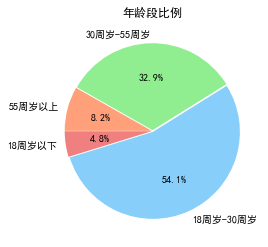

In [8]:
#年龄段饼图
labels = ['18周岁以下','18周岁-30周岁','30周岁-55周岁','55周岁以上']
count=231
share =[11/count,125/count,76/count,19/count]
# 设置分裂属性
explode = [0.01, 0.01, 0.01, 0.01] 
# 分裂饼图
plt.pie(share, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = False,
        colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightsalmon'])

# 标题
plt.title('年龄段比例')
plt.savefig("./age.png",dpi=500,bbox_inches = 'tight')
plt.show()



## 2、城市与农村

In [9]:
#城市与农村处理：
#    城市：1
#    农村：0
data.loc[data['城市']=='城市','城市'] = 1
data.loc[data['城市']=='农村','城市'] = 0
#统计城市与农村
data['城市'].value_counts()
#data.head()

1    192
0     39
Name: 城市, dtype: int64

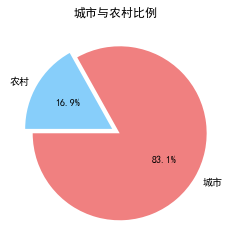

In [10]:
#城市与农村饼图
labels = ['城市','农村']
count=231
share =[192/count,39/count]
# 设置分裂属性
explode = [0.05, 0.05] 
# 分裂饼图
plt.pie(share, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = False,
        colors = ['lightcoral', 'lightskyblue'])
# 标题
plt.title('城市与农村比例')
plt.savefig("./city.png",dpi=500,bbox_inches = 'tight')
plt.show()

## 3、民族 

In [11]:
#民族处理：
#    汉族：1
#    其他：2
data.loc[data['民族']!='汉族','民族'] = 2
data.loc[data['民族']=='汉族','民族'] = 1
#统计民族情况
data['民族'].value_counts()
#data.head()

1    187
2     44
Name: 民族, dtype: int64

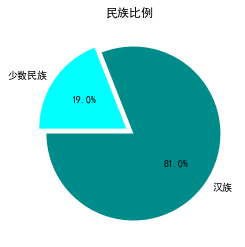

In [12]:
#民族饼图
labels = ['汉族','少数民族']
count=231
share =[187/count,44/count]
# 设置分裂属性
explode = [0.05, 0.05] 
# 分裂饼图
plt.pie(share, explode = explode,
        labels = labels, autopct = '%3.1f%%',
        startangle = 180, shadow = False,
        colors = ['darkcyan', 'cyan'])
# 标题
plt.title('民族比例')
plt.savefig("./nation.png",dpi=500,bbox_inches = 'tight')
plt.show()

## 为方便下述进行多项统计，对表进行拆分

In [13]:

#年龄段处理：
#   18周岁以下：     data1
#   18周岁-30周岁：  data2
#   30周岁-55周岁：  data3
#   55周岁以上：     data4
DataFrame1 = data.copy()
data1=DataFrame1[DataFrame1.年龄段.isin([1])]
data2=DataFrame1[DataFrame1.年龄段.isin([2])]
data3=DataFrame1[DataFrame1.年龄段.isin([3])]
data4=DataFrame1[DataFrame1.年龄段.isin([4])]

#城市/农村处理：
#   城市：  data5
#   农村：  data6
data5=DataFrame1[DataFrame1.城市.isin([1])]
data6=DataFrame1[DataFrame1.城市.isin([2])]

#民族处理：
#    汉族：  data7
#    其他：  data8
data7=DataFrame1[DataFrame1.民族.isin([1])]
data8=DataFrame1[DataFrame1.民族.isin([2])]

# 二、对多种死亡用语的调查

## 1、宗教用语调查

In [14]:
#拆分多选题

#拆分宗教用语的认知情况
y = [list(x.split('┋')) for x in data['宗教用语认知']]
yuanji = 0
guixian = 0
yuhua = 0
sheshen = 0
guiji = 0
nop = 0
for item in y:
    for select in item:
        if select=='圆寂':
            yuanji = yuanji+1
        elif select=='归仙':
            guixian = guixian + 1
        elif select=='羽化':
            yuhua = yuhua + 1
        elif select == '舍身':
            sheshen = sheshen +1
        elif select == '归寂':
            guiji = guiji +1
        else:
            nop = nop + 1
print('圆寂：',yuanji)
print('归仙：',guixian) 
print('羽化：',yuhua) 
print('舍身：',sheshen) 
print('归寂：',guiji)
print('都没听说过：',nop)


圆寂： 198
归仙： 133
羽化： 143
舍身： 60
归寂： 96
都没听说过： 29


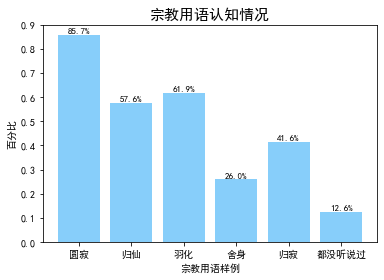

In [15]:
#绘制宗教用语柱形图
x=np.arange(6)
labels = ('圆寂','归仙', '羽化', '舍身','归寂','都没听说过')
share = [198/231, 133/231, 143/231,60/231,96/231,29/231]
plt.bar(x,share,color='lightskyblue', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('宗教用语样例')
plt.title('宗教用语认知情况',fontsize=15)
plt.savefig("./zongjiao_rec.png",dpi=500,bbox_inches = 'tight')
plt.show()


### 1.1  宗教用语使用频率

In [66]:
def get_num(data,idx1,idx2):
    ret = {}
    for i,name in enumerate(idx1):
        tmp = 0
        for item in data[name]:
            try:
                tmp += int(item)
            except Exception:
                pass
        ret[idx2[i]] = tmp
    return ret

ans = get_num(data,['宗教用语频率—圆寂','归仙','羽化','舍身','归寂'],['圆寂','归仙','羽化','舍身','归寂'])
print(ans.keys(),ans.values())

dict_keys(['圆寂', '归仙', '羽化', '舍身', '归寂']) dict_values([522, 319, 300, 272, 243])


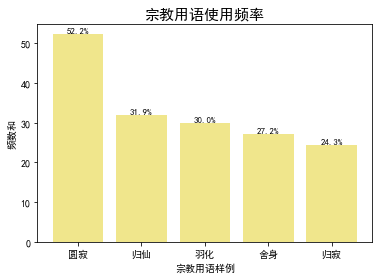

In [67]:
#宗教用语使用频率柱形图
x=np.arange(5)
labels = tuple(ans.keys())
share = list(map(div(10),[yuanji, guixian, yuhua, sheshen, guiji]))
plt.bar(x,share,color='khaki', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('频数和')
plt.xlabel('宗教用语样例')
plt.title('宗教用语使用频率',fontsize=15)
plt.savefig("./zongjiao_use.png",dpi=500,bbox_inches = 'tight')
plt.show()

#### 1.1.1  宗教用语分年龄段使用频率

In [20]:
#宗教用语分年龄段使用频率


#### 1.1.2 宗教用语分城市/农村使用频率

In [21]:
#宗教用语分城市/农村使用频率


#### 1.1.3  宗教用语分民族使用频率

In [22]:
#宗教用语分民族使用频率


### 1.2  宗教用语晦气程度

In [23]:
#宗教用语晦气程度


#### 1.2.1 宗教用语分年龄段晦气程度

In [24]:
#宗教用语分年龄段晦气程度


#### 1.2.2  宗教用语分城市/农村晦气程度

In [25]:
#宗教用语分城市/农村晦气程度


#### 1.2.3  宗教用语分民族晦气程度

In [26]:
#宗教用语分民族晦气程度


## 2、常规表述调查

In [27]:
#拆分常规表述的认知情况
def get_counts(inputs):
    '''
    对于“xx|yy|zz”形式进行计数
    '''
    y = [x for x in inputs.str.split('┋')]
    counts = {}

    for item in y:
        for select in item:
            if not counts.get(select):
                counts[select] = 1
            else:
                counts[select] += 1
    return counts
count = get_counts(data['常规表述认知'])
print(count.keys(),'\n',count.values())

dict_keys(['死', '去世', '没了', '走了', '作古', '长眠', '归西', '离开人世']) 
 dict_values([192, 218, 197, 212, 106, 148, 157, 184])


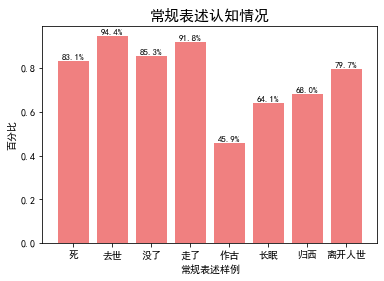

In [62]:
#绘制常规表述认知柱形图
x=np.arange(8)
labels = tuple(count.keys())
share = list(map(div(231),count.values()))
plt.bar(x,share,color='lightcoral', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('常规表述样例')
plt.title('常规表述认知情况',fontsize=15)
plt.savefig("./changgui_rec.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 2.1  常规表述使用频率

In [29]:
#常规表述使用频率


#### 2.1.1 常规表述分年龄段使用频率

In [30]:
#常规表述分年龄段使用频率


#### 2.1.2  常规表述分城市/农村使用频率

In [31]:
#常规表述分城市/农村使用频率


#### 2.1.3  常规表述分民族使用频率

In [32]:
#常规表述分民族使用频率


### 2.2  常规表述晦气程度

In [33]:
#常规表述晦气程度


#### 2.2.1  常规表述分年龄段晦气程度

In [34]:
#常规表述分年龄段晦气程度


#### 2.2.2  常规表述分城市/农村晦气程度

In [35]:
#常规表述分城市/农村晦气程度


#### 2.2.3  常规表述分民族晦气程度

In [36]:
#常规表述分民族晦气程度


## 3、网络用语调查

In [37]:
#拆分网络用语的认知情况
y = [x for x in data['网络用语认知'].str.split('┋')]
ji = 0
ga = 0
wu = 0
si1 = 0
si2 = 0
nop = 0
for item in y:
    for select in item:
        if select=='寄':
            ji = ji+1
        elif select=='噶':
            ga = ga + 1
        elif select=='无':
            wu = wu + 1
        elif select == '4':
            si1 = si1 +1
        elif select == '亖':
            si2 = si2 +1
        else:
            nop = nop + 1
        
print('寄：',ji)
print('噶：',ga) 
print('无：',wu) 
print('4：',si1) 
print('亖：',si2)
print('都没听说过：',nop)

寄： 132
噶： 147
无： 118
4： 120
亖： 112
都没听说过： 56


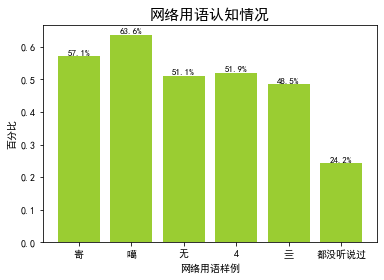

In [38]:
#绘制网络用语认知柱形图
x=np.arange(6)
labels = ('寄','噶','无','4','亖','都没听说过')
share = [132/231, 147/231, 118/231,120/231,112/231,56/231]
plt.bar(x,share,color='yellowgreen', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('网络用语样例')
plt.title('网络用语认知情况',fontsize=15)
plt.savefig("./net_rec.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 3.1 网络用语使用频率

In [39]:
#网络用语使用频率


#### 3.1.1  网络用语分年龄段使用频率

In [40]:
#网络用语分年龄段使用频率


#### 3.1.2  网络用语分城市/农村使用频率

In [41]:
#网络用语分城市/农村使用频率


#### 3.1.3  网络用语分民族使用频率

In [42]:
#网络用语分民族使用频率


### 3.2  网络用语晦气程度

In [43]:
#网络用语晦气程度


#### 3.2.1  网络用语分年龄段晦气程度

In [44]:
#网络用语分年龄段晦气程度


#### 3.2.2  网络用语分城市/农村晦气程度

In [45]:
#网络用语分城市/农村晦气程度


#### 3.2.3  网络用语分民族晦气程度

In [46]:
#网络用语分民族晦气程度


# 三、对丧葬方式的调查

## 1、丧葬方式认知情况 

In [47]:
#拆分丧葬方式的认知情况
y = [x for x in data['丧葬方式认知'].str.split('┋')]
tu = 0
huo = 0
shui = 0
tian = 0
other = 0
nop = 0
for item in y:
    for select in item:
        if select[0]=='土':
            tu = tu+1
        elif select[0]=='火':
            huo = huo + 1
        elif select[0]=='水':
            shui = shui + 1
        elif select[0] == '天':
            tian = tian +1
        elif select[0] == '其':
            other = other +1
        else:
            nop = nop + 1
        
print('土：',tu)
print('火：',huo) 
print('水：',shui) 
print('天：',tian) 
print('其：',other)
print('都没听过：',nop)

土： 222
火： 211
水： 132
天： 119
其： 4
都没听过： 0


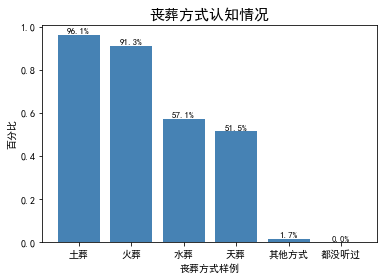

In [48]:
#绘制丧葬方式认知柱形图
x=np.arange(6)
labels = ('土葬','火葬','水葬','天葬','其他方式','都没听过')
share = [222/231, 211/231, 132/231,119/231,4/231,0/231]
plt.bar(x,share,color='steelblue', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('丧葬方式样例')
plt.title('丧葬方式认知情况',fontsize=15)
plt.savefig("./zang_rec.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 1.1 丧葬方式认知情况分年龄段

In [49]:
#18周岁以下
y = [x for x in data1['丧葬方式认知'].str.split('┋')]
tu = 0
huo = 0
shui = 0
tian = 0
other = 0
nop = 0
for item in y:
    for select in item:
        if select[0]=='土':
            tu = tu+1
        elif select[0]=='火':
            huo = huo + 1
        elif select[0]=='水':
            shui = shui + 1
        elif select[0] == '天':
            tian = tian +1
        elif select[0] == '其':
            other = other +1
        else:
            nop = nop + 1
        
print('土：',tu)
print('火：',huo) 
print('水：',shui) 
print('天：',tian) 
print('其：',other)
print('都没听过：',nop)

土： 11
火： 11
水： 6
天： 4
其： 0
都没听过： 0


In [50]:
#丧葬方式分年龄段柱形图

### 1.2 丧葬方式认知情况分城市/农村

In [51]:
#丧葬方式认知情况分城市/农村


### 1.3  丧葬方式认知情况分民族

In [52]:
#丧葬方式认知情况分民族


## 2、丧葬方式意愿统计 

In [53]:
#丧葬方式意愿统计 


###  2.1 丧葬方式意愿分年龄段

In [54]:
#丧葬方式意愿分年龄段


### 2.2  丧葬方式意愿分城市/农村

In [55]:
#丧葬方式意愿分城市/农村


### 2.3  丧葬方式意愿分民族

In [56]:
#丧葬方式意愿分民族


## 3、丧葬仪式意愿程度统计 

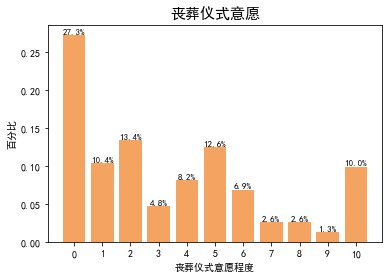

In [57]:
#丧葬仪式意愿程度
#统计各意愿值
data['丧葬仪式意愿程度'].value_counts()

#绘制丧葬仪式意愿程度柱形图
x=np.arange(11)
labels = ('0','1','2','3','4','5','6','7','8','9','10')
share = [63/231, 24/231, 31/231,11/231,19/231,29/231,16/231,6/231,6/231,3/231,23/231]
plt.bar(x,share,color='sandybrown', tick_label=labels) 
for a,b in zip(x,share):
    plt.text(a,b,"%.1f%%"%(b*100),ha='center', va= 'bottom',fontsize=9)
plt.ylabel('百分比')
plt.xlabel('丧葬仪式意愿程度')
plt.title('丧葬仪式意愿',fontsize=15)
plt.savefig("./zang_hope.png",dpi=500,bbox_inches = 'tight')
plt.show()

### 3.1  丧葬仪式意愿程度分年龄段

In [58]:
#丧葬仪式意愿程度分年龄段


### 3.2  丧葬仪式意愿程度分城市/农村

In [59]:
#丧葬仪式意愿程度分城市/农村


### 3.3  丧葬仪式意愿程度分民族

In [60]:
#丧葬仪式意愿程度分民族
